In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly

In [2]:
with open("test.txt") as fp:
    lines = fp.readlines()

In [3]:
from collections import defaultdict
import pandas as pd
import numpy as np
import re

In [4]:
metrics_dict = defaultdict(list)
time_log = []

for line in lines:
    line = line.strip()
    if 'training' in line:
        time_line = line.split()
        time_train = float(time_line[time_line.index('[time:') + 1][:-2])
        time_log.append(time_train)
    if 'serendipity' in line:
        metric_line = [i for i in line.split() if i != ':']
        metrics = [float(m) for m in metric_line[1::2]]
        metric_names = metric_line[::2]
        for name, value in zip(metric_names, metrics):
            metrics_dict[name].append(value)

In [5]:
recbole_log = pd.DataFrame(metrics_dict)
recbole_log['time'] = time_log

In [6]:
tf_log = pd.read_csv('../KGAT/170622log(100 epochs).csv')
# tf_log

In [7]:
# recbole_log

In [8]:
cols = plotly.colors.DEFAULT_PLOTLY_COLORS
topks = set(['top-' + re.findall(r'\d+', column)[0] for column in recbole_log.columns[:-1]])
cols_dict = {c: cols[i] for i, c in enumerate(topks)}
cols_dict

{'top-20': 'rgb(31, 119, 180)',
 'top-160': 'rgb(255, 127, 14)',
 'top-320': 'rgb(44, 160, 44)',
 'top-735': 'rgb(214, 39, 40)',
 'top-40': 'rgb(148, 103, 189)'}

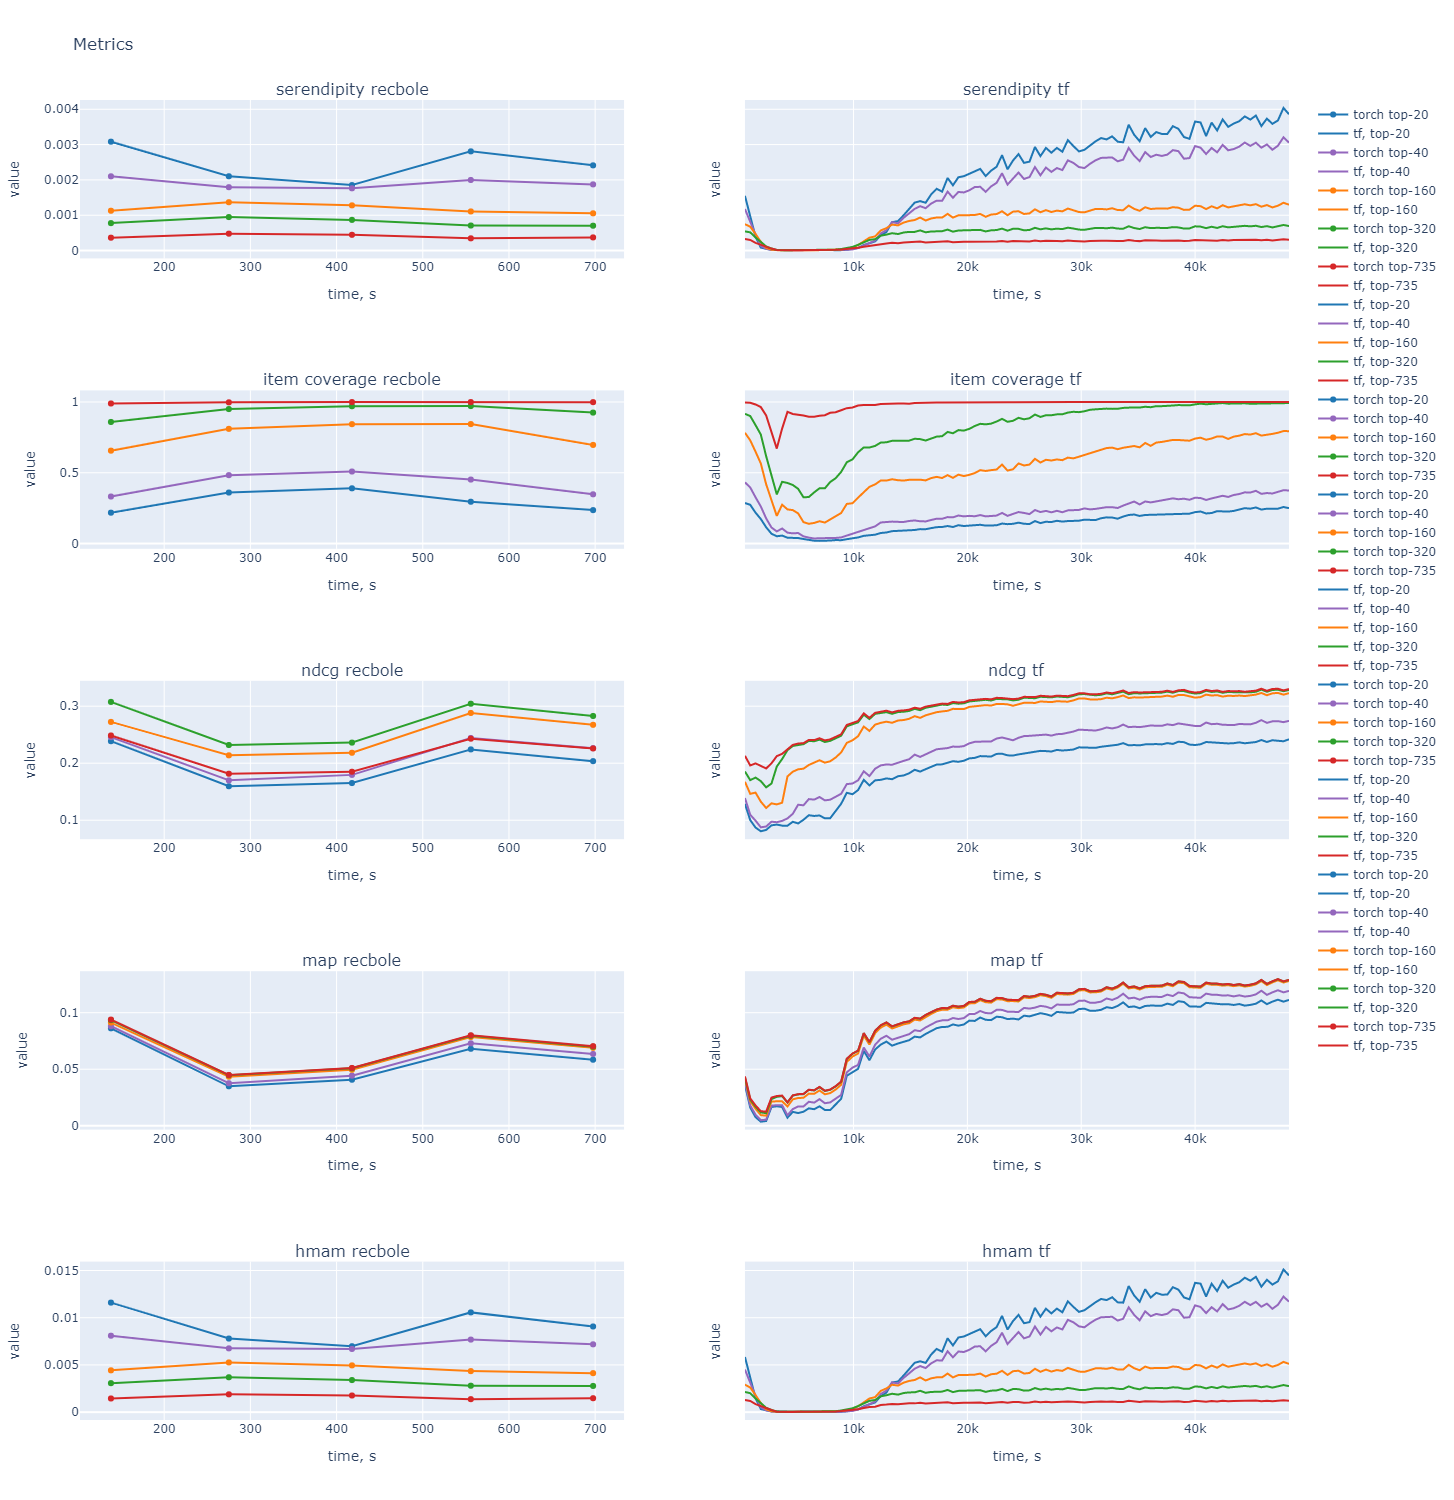

In [9]:


fig = make_subplots(rows=5, cols=2, shared_yaxes=True, subplot_titles=('serendipity recbole', 'serendipity tf',
                                                                       'item coverage recbole', 'item coverage tf',
                                                                       'ndcg recbole', 'ndcg tf',
                                                                       'map recbole', 'map tf',
                                                                       'hmam recbole', 'hmam tf'))

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('serendipity'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=1, col=1
        )
    if c2.startswith('serendipity'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=1, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('itemcoverage'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=2, col=1
        )
    if c2.startswith('coverage'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=2, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('ndcg'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=3, col=1
        )
    if c2.startswith('ndcg'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=3, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('map'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=4, col=1
        )
    if c2.startswith('map'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=4, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('hmam'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=recbole_log.time.cumsum(), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=5, col=1
        )
    if c2.startswith('hmam'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=tf_log.time.cumsum(), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=5, col=2
        )

fig.update_yaxes(title_text="value")
fig.update_xaxes(title_text="time, s")
fig.update_layout(height=1500, width=1400, title_text="Metrics")
fig.show(renderrer='svg')

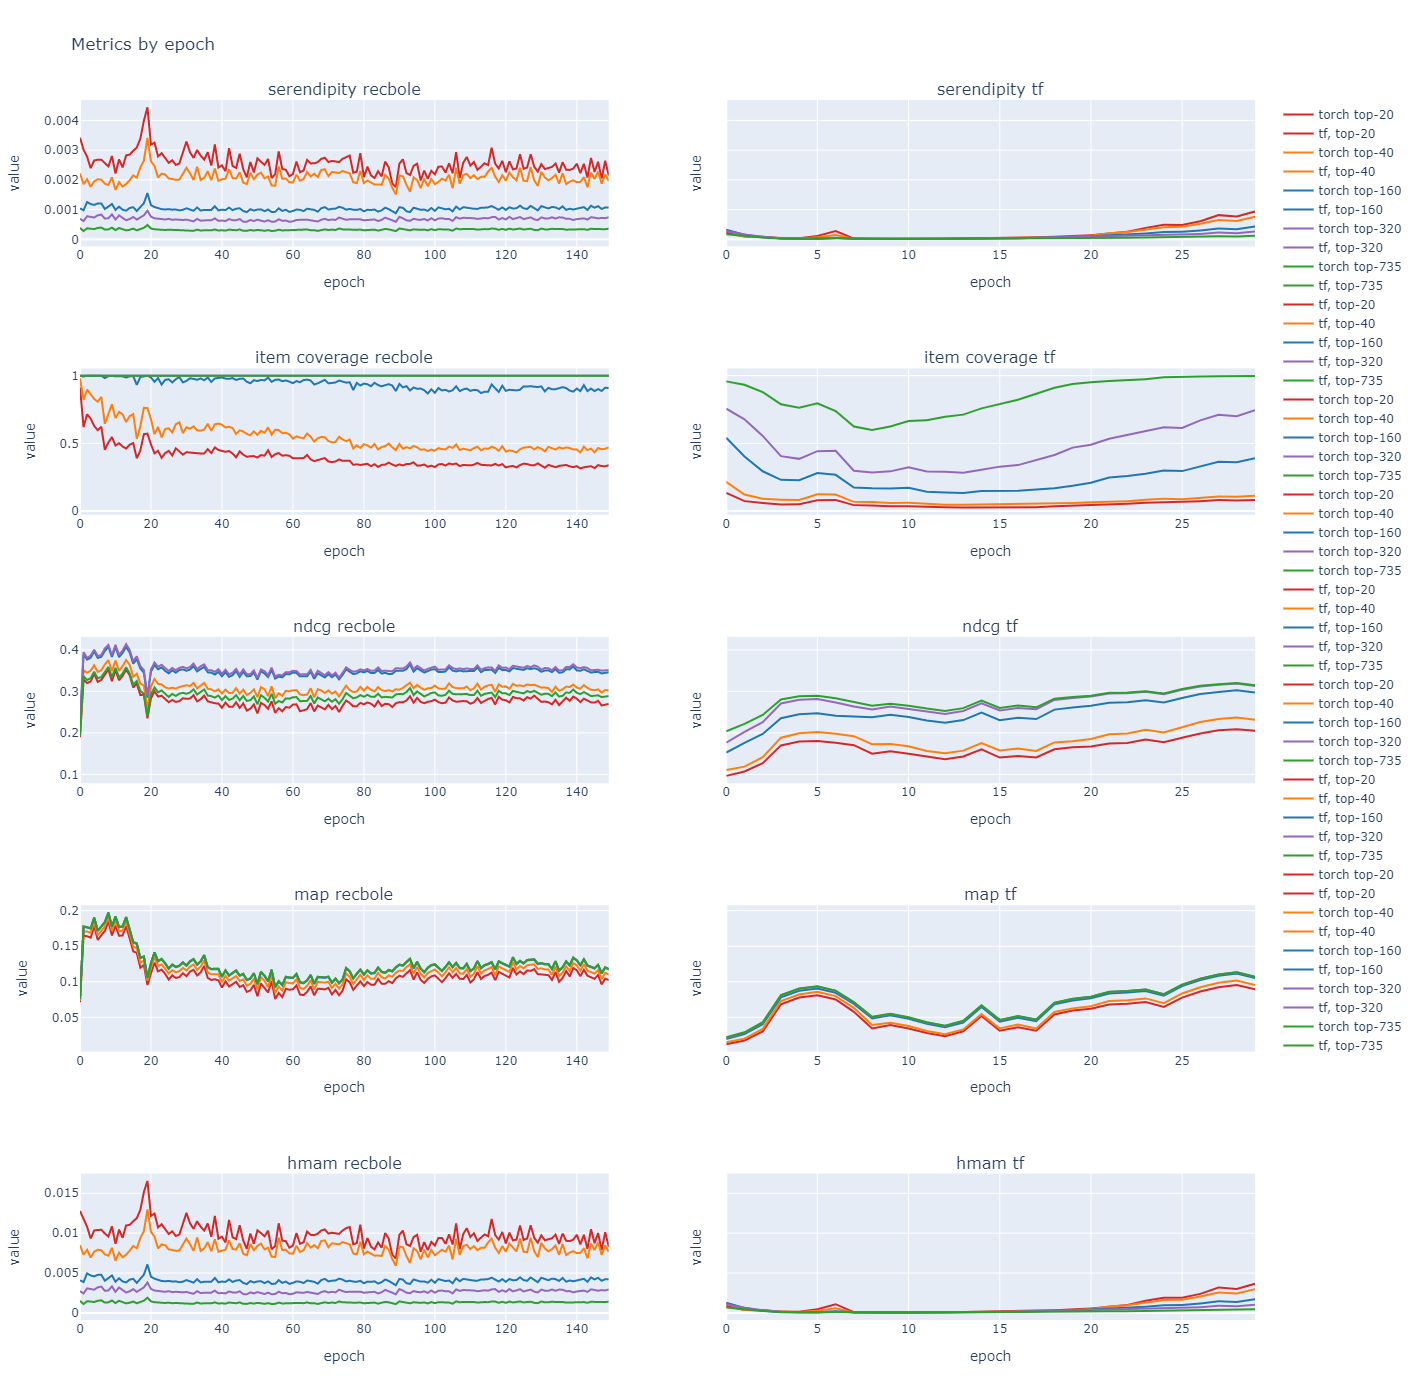

In [41]:
fig = make_subplots(rows=5, cols=2, shared_yaxes=True, subplot_titles=('serendipity recbole', 'serendipity tf',
                                                                       'item coverage recbole', 'item coverage tf',
                                                                       'ndcg recbole', 'ndcg tf',
                                                                       'map recbole', 'map tf',
                                                                       'hmam recbole', 'hmam tf'))

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('serendipity'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=1, col=1
        )
    if c2.startswith('serendipity'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(tf_log)), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=1, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('itemcoverage'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=2, col=1
        )
    if c2.startswith('coverage'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(tf_log)), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=2, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('ndcg'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=3, col=1
        )
    if c2.startswith('ndcg'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(tf_log)), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=3, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('map'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=4, col=1
        )
    if c2.startswith('map'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(tf_log)), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=4, col=2
        )

for c1, c2 in zip(recbole_log.columns, tf_log.columns):
    if c1.startswith('hmam'):
        name='torch top-' + re.findall(r'\d+', c1)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log[c1], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=5, col=1
        )
    if c2.startswith('hmam'):
        name='tf, top-' + re.findall(r'\d+', c2)[0]
        fig.add_trace(
            go.Scatter(x=np.arange(len(tf_log)), y=tf_log[c2], name=name, line=dict(width=2, color=cols_dict[name.split()[-1]])),
            row=5, col=2
        )

fig.update_yaxes(title_text="value")
fig.update_xaxes(title_text="epoch")
fig.update_layout(height=1400, width=1400, title_text="Metrics by epoch")
fig.show()

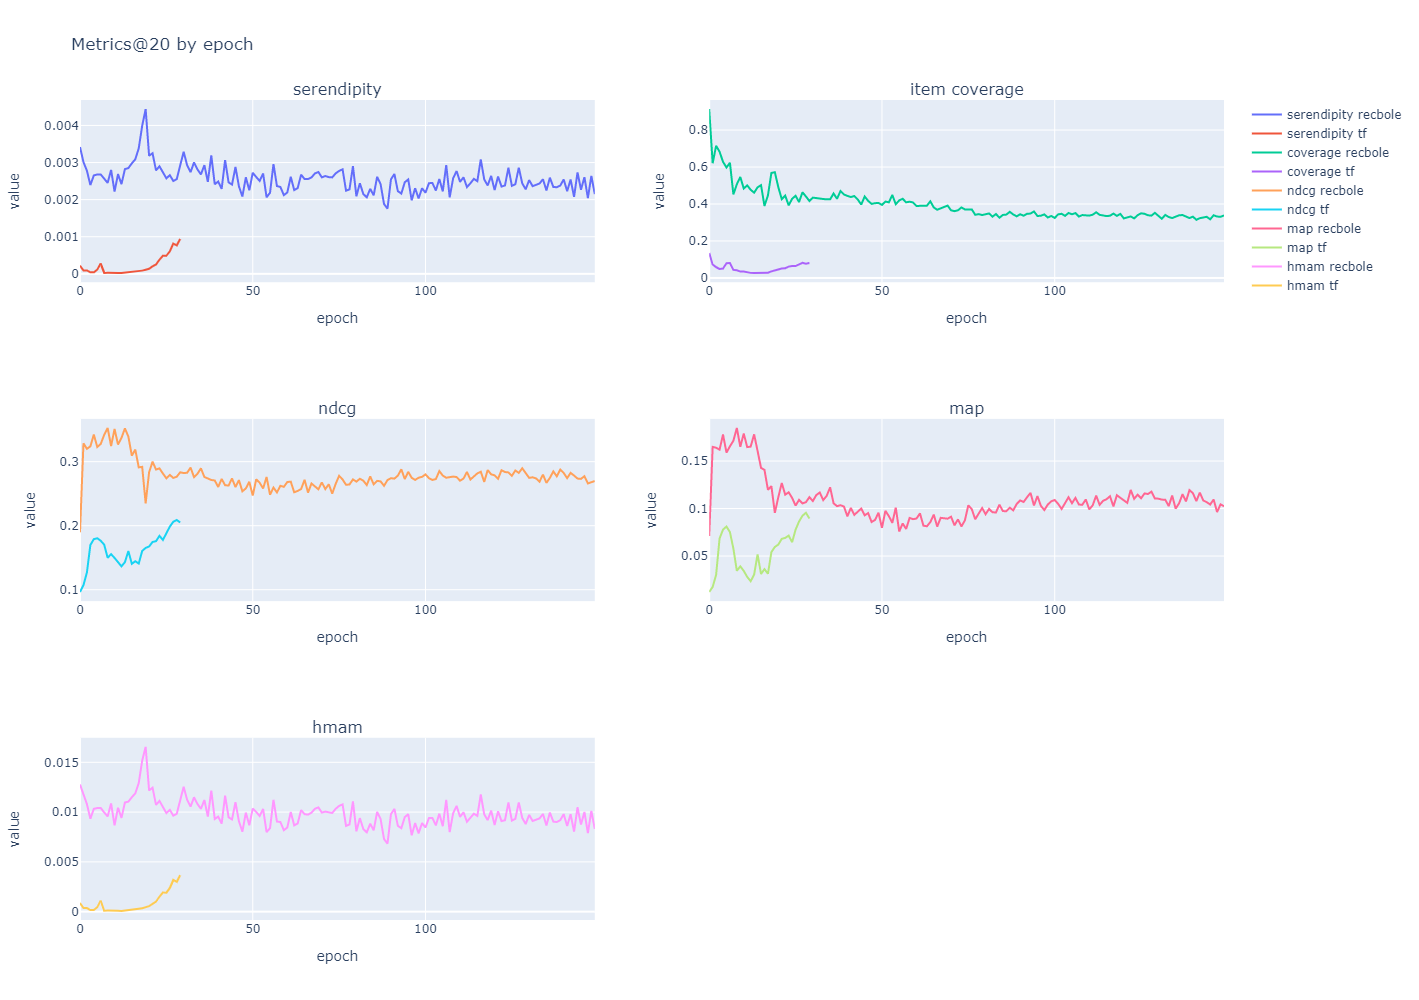

In [43]:
fig = make_subplots(rows=3, cols=2, shared_yaxes=False, subplot_titles=('serendipity',
                                                                       'item coverage',
                                                                       'ndcg',
                                                                       'map',
                                                                       'hmam'))
  
fig.add_trace(
    go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log['serendipity@20'], name='serendipity recbole'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=np.arange(len(tf_log)), y=tf_log['serendipity20'], name='serendipity tf'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log['itemcoverage@20'], name='coverage recbole'),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=np.arange(len(tf_log)), y=tf_log['coverage20'], name='coverage tf'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log['ndcg@20'], name='ndcg recbole'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=np.arange(len(tf_log)), y=tf_log['ndcg20'], name='ndcg tf'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log['map@20'], name='map recbole'),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=np.arange(len(tf_log)), y=tf_log['map20'], name='map tf'),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=np.arange(len(recbole_log)), y=recbole_log['hmam@20'], name='hmam recbole'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=np.arange(len(tf_log)), y=tf_log['hmam20'], name='hmam tf'),
    row=3, col=1
)
fig.update_yaxes(title_text="value")
fig.update_xaxes(title_text="epoch")
fig.update_layout(height=1000, width=1400, title_text="Metrics@20 by epoch")
fig.show()

In [138]:
import numpy as np
def serendipity(predictions: np.ndarray, unique_items: np.array,
                ratings_arr: np.ndarray, n_items: int = 50) -> float:
    """
    Calculation serendipity metric for each user and all prizes in recommendation

    mean(max(p(user) - p(all_users), 0) * rel(user))

    p(user) = (n_items - rank(user)) / n_items
    p(all_users) = (n_items - mean_rank(all_users)) / n_items
    rel(user) - 1 if prize was rated positively else 0

    Params:
    predictions - np.ndarray with ranked items
    unique_items - list of unique items
    ratings_arr - np.ndarray of shape (n_users, n_items)
                  with 1 if item rated positively else 0
    target_users - list of user_indices to use in calculation
    n_items - number of items in predictions to consider

    Returns:
    mean serendipity value
    """
    vect_indices = np.vectorize(get_indices, signature='(n)->(n)', excluded=['arr2'])
    all_indices = vect_indices(arr1=predictions, arr2=unique_items)
    mean_indices = np.mean(np.array(all_indices), axis=0)
    n_all_items = len(unique_items)
    all_s = []
    
    max_func = lambda x: x * (x > 0)

    for i, preds in enumerate(predictions[:, :n_items]):
        user_p = (n_all_items - np.arange(n_items)) / n_all_items
        all_users_p = (n_all_items - mean_indices[preds]) / n_all_items
#         print(user_p.shape, all_users_p.shape, ratings_arr.shape)
        s = np.mean(max_func(user_p - all_users_p) * ratings_arr[i, preds])
        all_s.append(s)
    return np.mean(all_s)

In [139]:
def get_indices(arr1: np.array, arr2: np.array) -> np.array:
    """
    For each element in second array, find the index in the first array

    Params:
    arr1 - single dimensional array with shuffled elements from arr2
    arr2 - single dimensional array with elements to find corresponding index in arr1

    Returns:
    indices - array with corresponding indices in arr1 for elements from arr2
    """
    xsorted = np.argsort(arr1)
    ypos = np.searchsorted(arr1[xsorted], arr2)
    indices = xsorted[ypos]
    return indices

In [158]:
preds = [[0, 2, 1], [2, 1, 0]]
rating_arr = [[1., 0., 0., 3.], [1., 0., 1., 3.]]
n_items = 3
config = {'topk': [2], 'metric_decimal_place': 2}

In [159]:
from lib.metrics import Serendipity
import torch

In [160]:
s1 = Serendipity(config).calculate_metric({'rec.items': torch.Tensor(preds).type(torch.LongTensor),
                                           'rec.topk': torch.Tensor(rating_arr).type(torch.LongTensor),
                                           'data.num_items': n_items})

In [161]:
s2 = serendipity(np.array(preds), np.arange(n_items), np.array(rating_arr)[:, :3], 2)

In [162]:
s2

0.125

In [163]:
s1

{'serendipity@2': 0.125}